In [20]:
import os
import sys

sys.path.insert(1, os.path.join(sys.path[0], ".."))

import numpy as np
import matplotlib.pyplot as plt
from argparse import ArgumentParser
import torch

import data_utils.utils as data_utils
import inference.utils as inference_utils
import BigGAN_PyTorch.utils as biggan_utils
from data_utils.datasets_common import pil_loader
import torchvision.transforms as transforms
import time
from glob import glob

import torch
import torchvision
from glob import glob
import utils
import os
from PIL import Image
from data_utils.resnet import resnet50
import torch.nn as nn
import timm
from metrics import metric_utils
import torchvision.transforms as T
import torch.nn.functional as F

In [21]:
device = "cuda"

In [22]:
def get_model(exp_name, root_path, backbone, device="cuda"):
    parser = biggan_utils.prepare_parser()
    parser = biggan_utils.add_sample_parser(parser)
    parser = inference_utils.add_backbone_parser(parser)

    args = ["--experiment_name", exp_name]
    args += ["--base_root", root_path]
    args += ["--model_backbone", backbone]

    config = vars(parser.parse_args(args=args))

    # Load model and overwrite configuration parameters if stored in the model
    config = biggan_utils.update_config_roots(config, change_weight_folder=False)
    generator, config = inference_utils.load_model_inference(config, device=device)
    biggan_utils.count_parameters(generator)
    generator.eval()

    return generator

In [23]:
# net = utils.load_pretrained_feature_extractor(
#         '/Work2/Watch_This/ICGAN/ic_gan/pretrained_models_path/swav_800ep_pretrain.pth.tar',
#         "selfsupervised",
#         "resnet50",
#     )
# net.eval()

In [24]:
vgg16_url = 'https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/metrics/vgg16.pkl'
vgg16 = metric_utils.get_feature_detector(vgg16_url, device=device)

In [25]:
exp_name = "%s_%s_%s_res%i%s" % (
        "icgan",
        "biggan",
        "imagenet",
        256,
        "",
    )
generator = get_model(
        exp_name, "/Work2/Watch_This/ICGAN/ic_gan/pretrained_models_path", "biggan", device=device
    )

# generator = torch.nn.DataParallel(generator)
generator.to("cuda")
generator.eval()

files = glob("/Work1/imagenet/train/*")

for file in files:
    os.makedirs(file.replace("imagenet", "ICGAN"), exist_ok=True)
    
files = glob("/Work1/imagenet/train/*/*")

for file in files:
    os.makedirs(file.replace("imagenet", "ICGAN").replace(".JPEG", ""), exist_ok=True)
    
dataset = utils.get_dataset_images(
        256,
        data_path="/Work1/imagenet",
        longtail=False,
        split="train",
        test_part=False,
        which_dataset="imagenet",
        instance_json="",
        stuff_json="",
        get_encodings=True,
    )

generator1 = torch.Generator().manual_seed(42)
dataset, _, _, _ = torch.utils.data.random_split(dataset, [0.25, 0.25, 0.25, 0.25], generator=generator1)

kwargs = {
    "num_workers": 14,
    "pin_memory": True,
    "drop_last": False,
#     "persistent_workers": True,
}

train_loader = utils.get_dataloader(
    dataset, 120, shuffle=False, **kwargs
)



Pegging all root folders to base root /Work2/Watch_This/ICGAN/ic_gan/pretrained_models_path
For name best  best0  we have an FID:  22.453704833984375
Checkpoint with name  best1  not in folder.
Final name selected is  best0
Loading best0 weights from /Work2/Watch_This/ICGAN/ic_gan/pretrained_models_path/icgan_biggan_imagenet_res256...
Experiment name is icgan_biggan_imagenet_res256
Adding attention layer in G at resolution 64
Param count for Gs initialized parameters: 90014147
Loading weights...
Loading best0 weights from /Work2/Watch_This/ICGAN/ic_gan/pretrained_models_path/icgan_biggan_imagenet_res256...
Putting G in eval mode..
Number of parameters: 90014340
Generating  Index file imagenet_imgs.npz...


100%|█████████████████████████████████████████████| 2/2 [00:03<00:00,  1.97s/it]


Dropping last batch?  False
Loader workers? {'num_workers': 14, 'pin_memory': True, 'drop_last': False}  with shuffle? False


In [34]:
dataset = utils.get_dataset_images(
        256,
        data_path="/Work1/imagenet",
        longtail=False,
        split="train",
        test_part=False,
        which_dataset="imagenet",
        instance_json="",
        stuff_json="",
        get_encodings=True,
    )

Generating  Index file imagenet_imgs.npz...


100%|█████████████████████████████████████████████| 2/2 [00:03<00:00,  1.86s/it]


In [35]:
loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=44,
    num_workers=12,
    pin_memory=True,
#     sampler=sampler,
)

In [36]:
for ind, data in enumerate(loader):
    data0 = data[0].cuda(gpu, non_blocking=True)
    break

In [37]:
data[3]

['/Work1/imagenet/train/n01440764/n01440764_10026.JPEG',
 '/Work1/imagenet/train/n01440764/n01440764_10027.JPEG',
 '/Work1/imagenet/train/n01440764/n01440764_10029.JPEG',
 '/Work1/imagenet/train/n01440764/n01440764_10040.JPEG',
 '/Work1/imagenet/train/n01440764/n01440764_10042.JPEG',
 '/Work1/imagenet/train/n01440764/n01440764_10043.JPEG',
 '/Work1/imagenet/train/n01440764/n01440764_10048.JPEG',
 '/Work1/imagenet/train/n01440764/n01440764_10066.JPEG',
 '/Work1/imagenet/train/n01440764/n01440764_10074.JPEG',
 '/Work1/imagenet/train/n01440764/n01440764_1009.JPEG',
 '/Work1/imagenet/train/n01440764/n01440764_10095.JPEG',
 '/Work1/imagenet/train/n01440764/n01440764_10108.JPEG',
 '/Work1/imagenet/train/n01440764/n01440764_10110.JPEG',
 '/Work1/imagenet/train/n01440764/n01440764_10120.JPEG',
 '/Work1/imagenet/train/n01440764/n01440764_10124.JPEG',
 '/Work1/imagenet/train/n01440764/n01440764_10150.JPEG',
 '/Work1/imagenet/train/n01440764/n01440764_10159.JPEG',
 '/Work1/imagenet/train/n0144076

In [38]:
# net = net.eval()
vgg16 = vgg16.eval()
generator = generator.eval()


num_steps = 1000
initial_learning_rate = 0.1
lr_rampdown_length = 0.25
lr_rampup_length = 0.05
verbose = True
noise_mode="const"

In [ ]:
gpu = torch.device("cuda")
scaler = torch.cuda.amp.GradScaler()
for ind, data in enumerate(loader):
    with torch.no_grad():
        start_time = time.time()
        data0 = data[0].cuda(gpu, non_blocking=True)
        x_feat2 =  data[4].cuda(gpu, non_blocking=True)

#         z1 = torch.normal(0.0, 1.0, (x_tf3.shape[0], 119)).cuda(gpu)
        z1 = torch.zeros((data0.shape[0], 119)).cuda(gpu)
        
        x_img_orig = generator(z1, None, x_feat2)
        

        real_img = torch.clamp((data0 * 0.5 + 0.5), 0, 1)

        target_img = real_img*255
        target_features = vgg16(F.interpolate(target_img, size=(224, 224)), resize_images=False, return_lpips=True)
    
    z2 = torch.tensor(z1, dtype=torch.float32, device=gpu, requires_grad=True)
    
    optimizer = torch.optim.Adam([z2], betas=(0.9, 0.999), lr=initial_learning_rate)
    scheduler = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=0.1, total_iters=20)
#     optimizer = torch.optim.Adagrad([z2], lr=initial_learning_rate)
    
    for step in range(num_steps):
#         # Learning rate schedule.
#         t = step / num_steps
#         lr_ramp = min(1.0, (1.0 - t) / lr_rampdown_length)
#         lr_ramp = 0.5 - 0.5 * np.cos(lr_ramp * np.pi)
#         lr_ramp = lr_ramp * min(1.0, t / lr_rampup_length)
#         lr = initial_learning_rate * lr_ramp
#         for param_group in optimizer.param_groups:
#             param_group['lr'] = lr
          
        optimizer.zero_grad(set_to_none=True)
        with torch.cuda.amp.autocast():
            x_img = generator(z2, None, x_feat2)
            synth_images = (x_img + 1) * (255/2)
            synth_features = vgg16(F.interpolate(synth_images, size=(224, 224)), resize_images=False, return_lpips=True)
            lpips_loss = (target_features - synth_features).square().sum(dim=1).sum()
#             mse_loss = l2_criterion(target_img, synth_images)
            loss = lpips_loss
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        scheduler.step()
        
        if step % 10 == 0:
            print(step)
    
    end_time = time.time()
    days_to_calculate = ((((end_time - start_time)/float(loader.batch_size))/4.0)*1300000.0)/86400.0
    print("Days to Complete: " + str(days_to_calculate))
    break

/tmp/ipykernel_1848334/3011056883.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  z2 = torch.tensor(z1, dtype=torch.float32, device=gpu, requires_grad=True)
/home/sarmst/.local/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790


In [ ]:
n = 0

In [ ]:
_real_img = torchvision.transforms.functional.to_pil_image(real_img[n])
_real_img

In [ ]:
real_img[0].shape

In [ ]:
_gen_img = torch.clamp((x_img[n] * 0.5 + 0.5), 0, 1)    
_gen_img = torchvision.transforms.functional.to_pil_image(_gen_img)
_gen_img

In [ ]:
_x_img_orig = torch.clamp((x_img_orig[n].cpu() * 0.5 + 0.5), 0, 1)    
_x_img_orig = torchvision.transforms.functional.to_pil_image(_x_img_orig)
_x_img_orig

In [ ]:
n = 1

In [ ]:
_real_img = torchvision.transforms.functional.to_pil_image(real_img[n])
_real_img

In [ ]:
gen_img = torch.clamp((x_img[n].cpu() * 0.5 + 0.5), 0, 1)    
_gen_img = torchvision.transforms.functional.to_pil_image(gen_img)
_gen_img

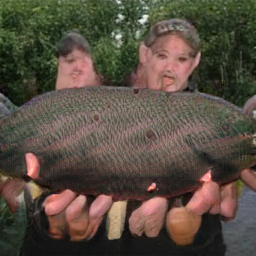

In [19]:
_x_img_orig = torch.clamp((x_img_orig[n].cpu() * 0.5 + 0.5), 0, 1)    
_x_img_orig = torchvision.transforms.functional.to_pil_image(_x_img_orig)
_x_img_orig

In [20]:
n = 12

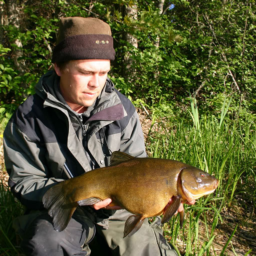

In [21]:
_real_img = torchvision.transforms.functional.to_pil_image(real_img[n])
_real_img

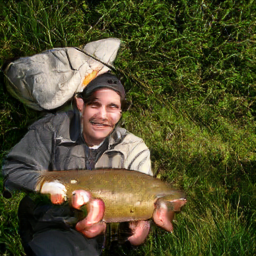

In [22]:
gen_img = torch.clamp((x_img[n].cpu() * 0.5 + 0.5), 0, 1)    
_gen_img = torchvision.transforms.functional.to_pil_image(gen_img)
_gen_img

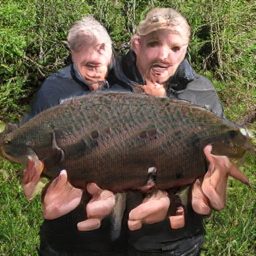

In [23]:
_x_img_orig = torch.clamp((x_img_orig[n].cpu() * 0.5 + 0.5), 0, 1)    
_x_img_orig = torchvision.transforms.functional.to_pil_image(_x_img_orig)
_x_img_orig